# K-means clustering exercises

1. Look at the non-convex clusters below from the lecture notes.

a) Use k-means clustering with k = 2 to cluster it, visualise the results and evaluate the silohuette score of the clusters. Interpret the value.

b) Loop through values of k up to 10 and see how it affects the silohuette score. Plot your findings.

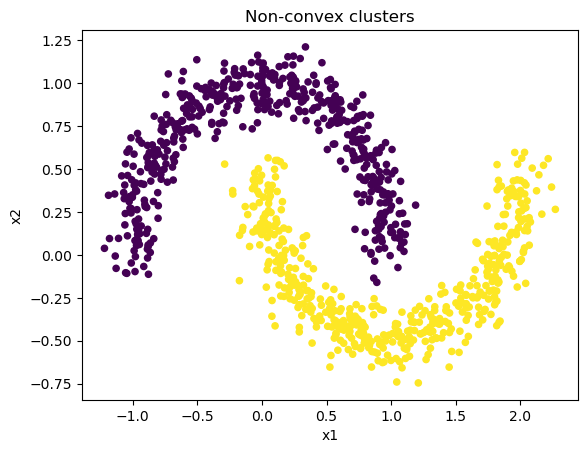

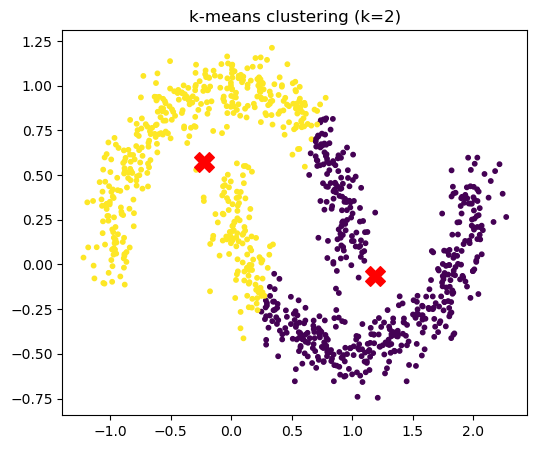

Silhouette score: 0.4819646194122571


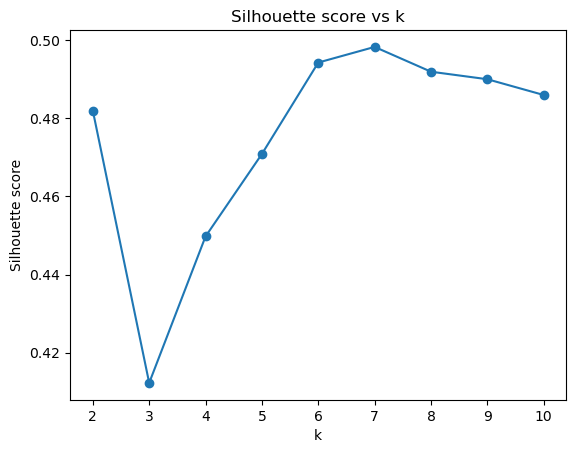

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
df = pd.DataFrame(X, columns=["x1", "x2"])
df.plot.scatter("x1", "x2", c=y, colormap="viridis", colorbar=False, title = "Non-convex clusters")

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=10)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    c="red", s=200, marker="X"
)
plt.title("k-means clustering (k=2)")
plt.show()
score = silhouette_score(X, labels)
print("Silhouette score:", score)

ks = range(2, 11)
scores = []

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)
plt.plot(ks, scores, marker="o")
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.title("Silhouette score vs k")
plt.show()


2) Code k-means clustering in numpy using the below guidelines, taken from: https://www.deep-ml.com/problems/17 (highly recommend this website for learning ML!)

**K-Means Clustering Algorithm Implementation**

*Initialization:*
Use the provided initial_centroids as your starting point. This step is already done for you in the input.

*Assignment Step:*
For each point in your dataset:
1. Calculate its distance to each centroid.
2. Assign the point to the cluster of the nearest centroid (use the Euclidean distance function).

*Update Step:*
For each cluster:
1. Calculate the mean of all points assigned to the cluster.
2. Update the centroid to this new mean position.
Hint: Be careful with potential empty clusters. Decide how you'll handle them (e.g., keep the previous centroid).

*Iteration:*
Repeat steps 2 and 3 until either:

1. The centroids no longer change significantly (this case does not need to be included in your solution), or
2. You reach the max_iterations limit.
Hint: You might want to keep track of the previous centroids to check for significant changes.

In [2]:
def euclidean_distance(a, b):
  return np.sqrt(((a - b) ** 2).sum(axis=1))

def k_means_clustering(points: list[tuple[float, ...]], k: int, initial_centroids: list[tuple[float, ...]], max_iterations: int) -> list[tuple[float, ...]]:
	# Your code here
    points = np.array(points)
    centroids = np.array(initial_centroids)
    for _ in range(max_iterations):
        distances = np.array([
            euclidean_distance(points, centroid)
            for centroid in centroids
        ])
        labels = np.argmin(distances, axis=0)

        new_centroids = []

        for i in range(k):
            cluster_points = points[labels == i]

            if len(cluster_points) == 0:
                new_centroids.append(centroids[i])
            else:
                new_centroids.append(cluster_points.mean(axis=0))

        new_centroids = np.array(new_centroids)
        centroids = new_centroids
  
    return [tuple(np.round(c, 4)) for c in centroids]

In [3]:
# Your function should past these tests:

assert k_means_clustering([(1, 2), (1, 4), (1, 0), (10, 2), (10, 4), (10, 0)], 2, [(1, 1), (10, 1)], 10) == [(1.0, 2.0), (10.0, 2.0)]

assert k_means_clustering([(0, 0, 0), (2, 2, 2), (1, 1, 1), (9, 10, 9), (10, 11, 10), (12, 11, 12)], 2, [(1, 1, 1), (10, 10, 10)], 10) == [(1.0, 1.0, 1.0), (10.3333, 10.6667, 10.3333)]

assert k_means_clustering([(1, 1), (2, 2), (3, 3), (4, 4)], 1, [(0,0)], 10) == [(2.5, 2.5)]

assert k_means_clustering([(0, 0), (1, 0), (0, 1), (1, 1), (5, 5), (6, 5), (5, 6), (6, 6),(0, 5), (1, 5), (0, 6), (1, 6), (5, 0), (6, 0), (5, 1), (6, 1)], 4, [(0, 0), (0, 5), (5, 0), (5, 5)], 10) == [(0.5, 0.5), (0.5, 5.5), (5.5, 0.5), (5.5, 5.5)]

# K-Nearest Neighbours Exercises

3. Look at the dataset from make_circles below.

a) Try and fit from values k = 1 -> 100 (use the [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) function. Plot k against model score and choose which value of k is best, justify your decision.

b) Plot a [decision boundary](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html) for the best score.

Best k: 5
Best CV accuracy: 0.9730000000000001


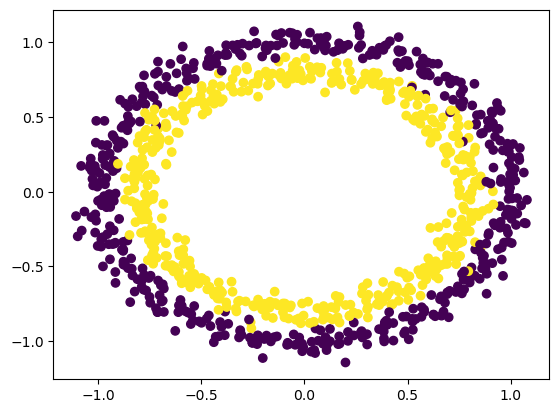

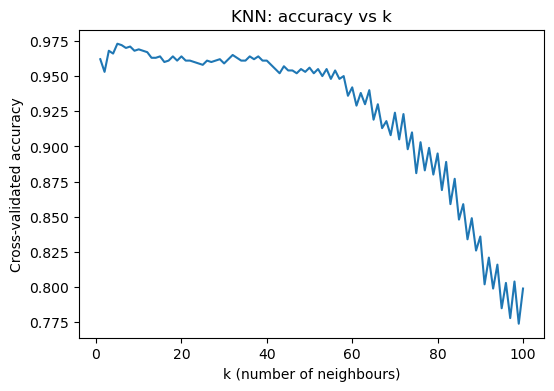

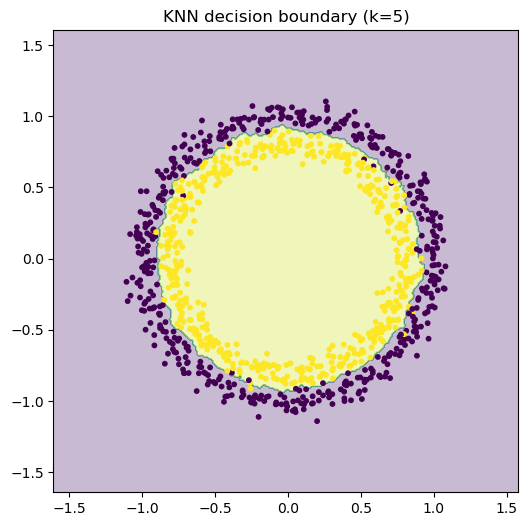

In [8]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, noise = 0.05)

# plot it
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis")

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

param_grid = {
    "n_neighbors": list(range(1, 101))
}
grid = GridSearchCV(
    knn,
    param_grid,
    cv=5,
    scoring="accuracy"
)

grid.fit(X, y)
ks = grid.cv_results_["param_n_neighbors"]
scores = grid.cv_results_["mean_test_score"]

best_k = grid.best_params_["n_neighbors"]
best_score = grid.best_score_

print("Best k:", best_k)
print("Best CV accuracy:", best_score)

plt.figure(figsize=(6, 4))
plt.plot(ks, scores)
plt.xlabel("k (number of neighbours)")
plt.ylabel("Cross-validated accuracy")
plt.title("KNN: accuracy vs k")
plt.show()

best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X, y)
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 300),
    np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 300)
)

grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = best_knn.predict(grid_points)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, Z, cmap="viridis", alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", s=10)
plt.title(f"KNN decision boundary (k={best_k})")
plt.show()



4. Given a list of points in n-dimensional space represented and a query point, implement a function to find the k nearest neighbors to the query point using Euclidean distance. Inspired by: https://www.deep-ml.com/problems/173

In [10]:
import numpy as np

def k_nearest_neighbors(points, query_point, k):
    """
    Find k nearest neighbors to a query point

    Args:
        points: List of tuples representing points [(x1, y1), (x2, y2), ...]
        query_point: Tuple representing query point (x, y)
        k: Number of nearest neighbors to return

    Returns:
        List of k nearest neighbor points as tuples
    """
    if not points or k <= 0:
        return []

    if k > len(points):
        k = len(points)

    # Convert to numpy arrays for vectorized operations
    points_array = np.array(points)
    query_array = np.array(query_point)

    # Put the rest of your code here!
    distances = np.sqrt(((points_array - query_array) ** 2).sum(axis=1))
    nearest_indices = np.argsort(distances)[:k]
    return [tuple(points_array[i]) for i in nearest_indices]

In [11]:
# Your function should pass the following tests:

assert k_nearest_neighbors([(1, 2), (3, 4), (1, 1), (5, 6), (2, 3)], (2, 2), 3) == [(1, 2), (2, 3), (1, 1)]

assert k_nearest_neighbors([(0, 0), (1, 1), (2, 2), (3, 3)], (1.5, 1.5), 2) == [(1, 1), (2, 2)]

assert k_nearest_neighbors([(1, 1), (2, 2), (3, 3)], (0, 0), 1) == [(1, 1)]